In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Understanding Data

### Target variable SalePrice

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Columns that are objects
train.columns[train.dtypes == object]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
train.columns[train.dtypes != object]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
for col in train.columns[train.dtypes == object]:
    print(col, len(train[col].unique()),train[col].unique())

MSZoning 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 2 ['Pave' 'Grvl']
Alley 3 [nan 'Grvl' 'Pave']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 2 ['AllPub' 'NoSeWa']
LotConfig 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
E

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'MSSubClass')

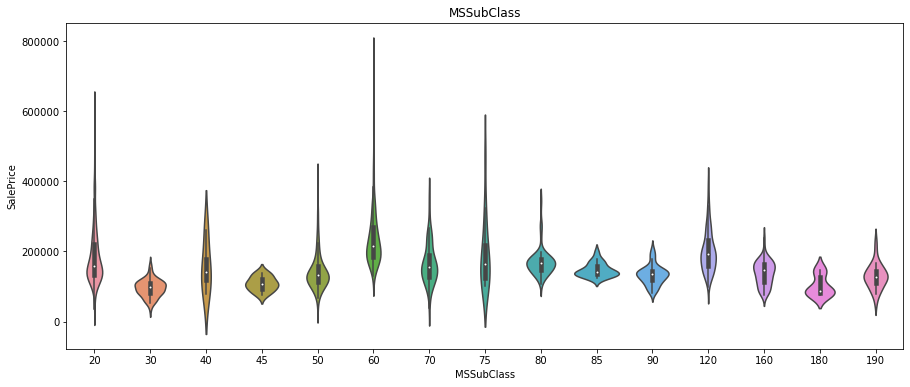

In [9]:
plt.figure(figsize=(15,6))
sns.violinplot(x="MSSubClass", y="SalePrice", data=train).set_title("MSSubClass")

Text(0.5, 1.0, 'LotShape')

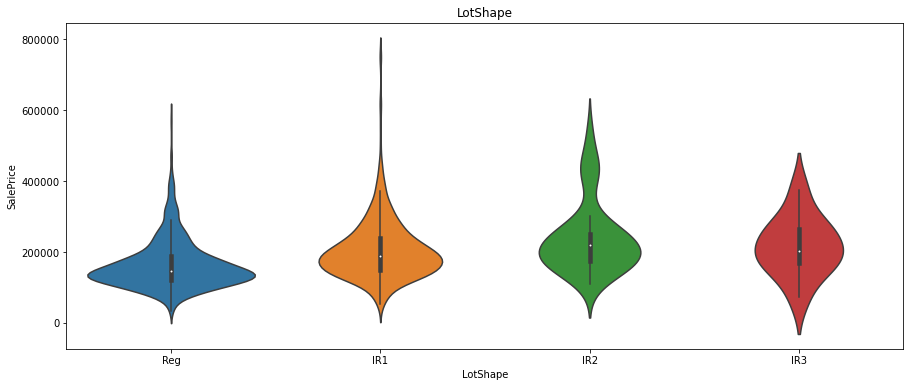

In [10]:
plt.figure(figsize=(15,6))
sns.violinplot(x="LotShape", y="SalePrice", data=train).set_title("LotShape")

Text(0.5, 1.0, 'LotShape')

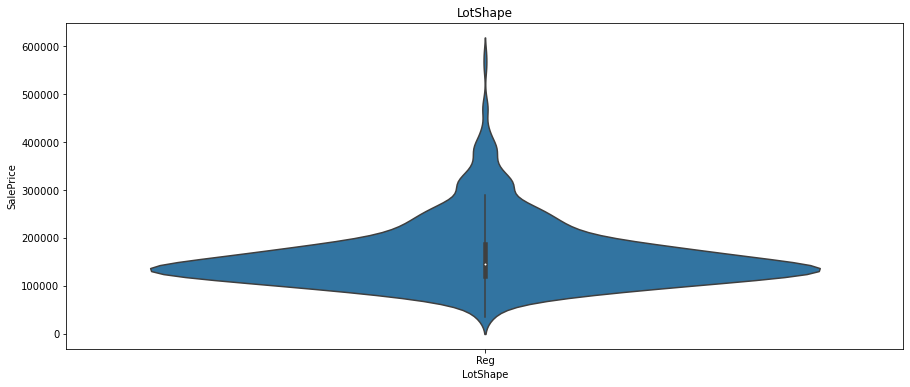

In [11]:
#focus on Reg
plt.figure(figsize=(15,6))
sns.violinplot(x="LotShape", y="SalePrice", data=train[train["LotShape"] == "Reg"]).set_title("LotShape")

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

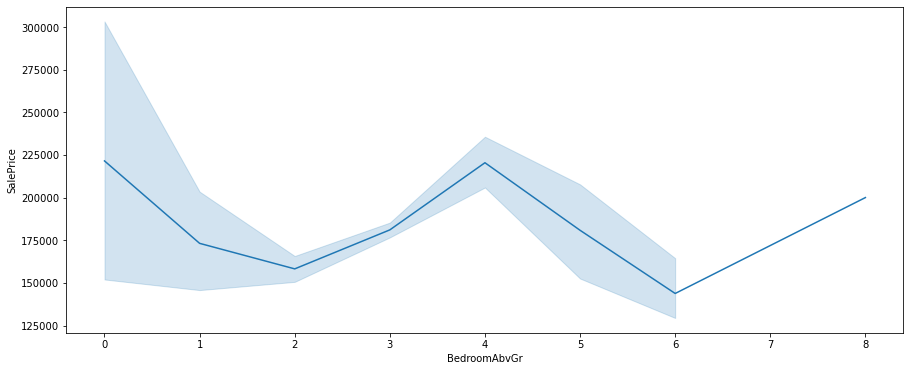

In [12]:
plt.figure(figsize=(15,6))
sns.lineplot(x='BedroomAbvGr', y='SalePrice', data = train)

<AxesSubplot:>

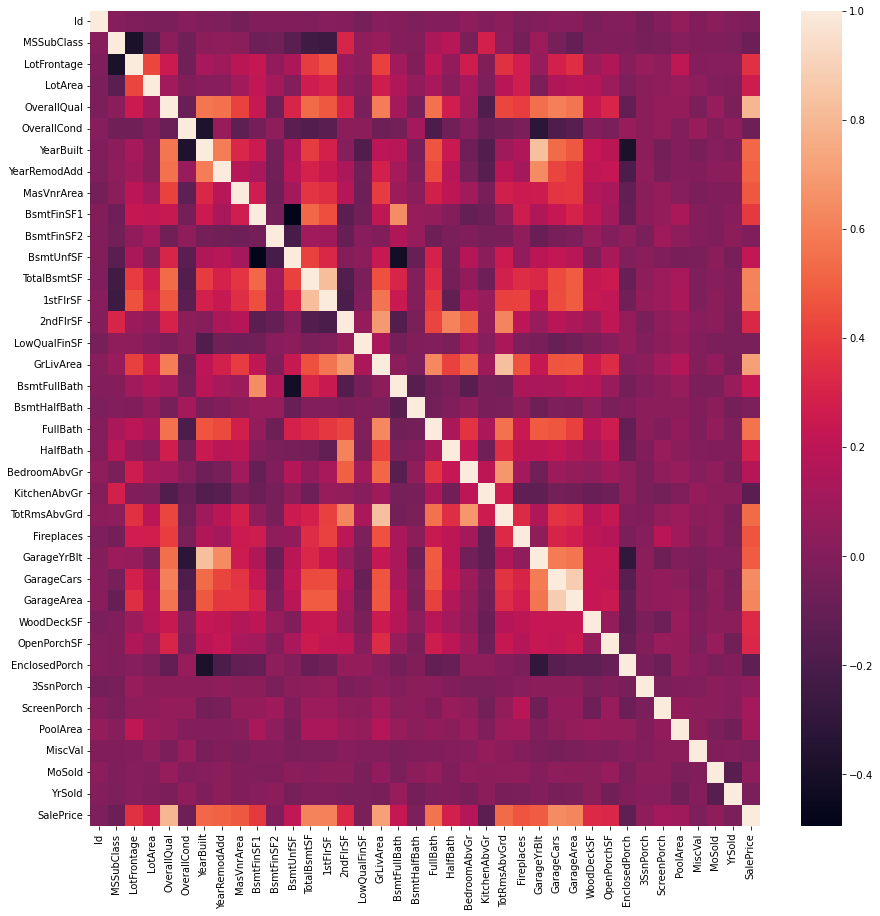

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr())

## Data Preperation / Feature Engineering

In [14]:
temp = train[["Id","BedroomAbvGr", "KitchenAbvGr"]]
pd.get_dummies(train["MSSubClass"])

,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1458,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
## Columns mentioned in data_description.txt <- Enum Types or Categories
temp = train[["Id","BedroomAbvGr", "KitchenAbvGr"]]
train.columns[train.dtypes != object]
cols = ['MSSubClass','OverallQual', 'OverallCond']
cols += list(train.columns[train.dtypes == object])
for col in cols:  
    strs = f"{col}"
    temp = temp.join(pd.get_dummies(train[col], prefix=strs))
   
temp.head()

,Id,BedroomAbvGr,KitchenAbvGr,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,3,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,3,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,3,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,3,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,5,4,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
temps = temp.copy()
for i in list(train.columns[train.dtypes != object]):
    if i not in ['MSSubClass','OverallQual', 'OverallCond']:
        temps[i] = train[i].fillna(0).astype('int64')
print("\n Column information \n")
for i in zip(list(temps.columns), list(temps.dtypes)):
    print(f"Name: {i[0]},    Type: {i[1]}")

# We dont need the id columns
temps = temps.drop(columns=["Id"])


 Column information 

Name: Id,    Type: int64
Name: BedroomAbvGr,    Type: int64
Name: KitchenAbvGr,    Type: int64
Name: MSSubClass_20,    Type: uint8
Name: MSSubClass_30,    Type: uint8
Name: MSSubClass_40,    Type: uint8
Name: MSSubClass_45,    Type: uint8
Name: MSSubClass_50,    Type: uint8
Name: MSSubClass_60,    Type: uint8
Name: MSSubClass_70,    Type: uint8
Name: MSSubClass_75,    Type: uint8
Name: MSSubClass_80,    Type: uint8
Name: MSSubClass_85,    Type: uint8
Name: MSSubClass_90,    Type: uint8
Name: MSSubClass_120,    Type: uint8
Name: MSSubClass_160,    Type: uint8
Name: MSSubClass_180,    Type: uint8
Name: MSSubClass_190,    Type: uint8
Name: OverallQual_1,    Type: uint8
Name: OverallQual_2,    Type: uint8
Name: OverallQual_3,    Type: uint8
Name: OverallQual_4,    Type: uint8
Name: OverallQual_5,    Type: uint8
Name: OverallQual_6,    Type: uint8
Name: OverallQual_7,    Type: uint8
Name: OverallQual_8,    Type: uint8
Name: OverallQual_9,    Type: uint8
Name: OverallQ

## Exploratory Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,max_error,RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,max_error,RocCurveDisplay

In [18]:
#Lets split training data into train and test
train_x = temps.iloc[:,temps.columns != 'SalePrice']
train_y = temps["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.33, random_state=42)

In [19]:
regr = RandomForestRegressor(max_depth=200, random_state=42)
adr = AdaBoostRegressor(n_estimators=200, random_state=42)
gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

regr.fit(X_train, y_train)
adr.fit(X_train, y_train)
gdr.fit(X_train, y_train)

y_pred_rgr = regr.predict(X_test)
y_pred_adr = adr.predict(X_test)
y_pred_gdr = gdr.predict(X_test)

#metrics for exlaining  R^2 adj R^2,  metrics for model performance testing MSE, RMSE, MAE
print(f"RandomForestRegressor: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");
print(f"AdaBoostRegressor: R^2 = {r2_score(y_test, y_pred_adr)}, max_error={max_error(y_test, y_pred_adr) }");
print(f"GradientBoostingRegressor: R^2 = {r2_score(y_test, y_pred_gdr)}, max_error={max_error(y_test, y_pred_gdr) }");

RandomForestRegressor: R^2 = 0.8567513013829446, max_error=293560.64
AdaBoostRegressor: R^2 = 0.803904432366449, max_error=293950.37735849054
GradientBoostingRegressor: R^2 = 0.8755050564151349, max_error=326501.0921057936


In [20]:
#using PCA
from sklearn.decomposition import PCA
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
train_x_c = min_max_scaler.fit_transform(train_x.copy())
train_x_pca = PCA(n_components=5)

X_train, X_test, y_train, y_test = train_test_split(train_x_pca.fit_transform(train_x_c)\
                                                    ,train_y, test_size=0.33, random_state=42)

regr = RandomForestRegressor(max_depth=200, random_state=42)
adr = AdaBoostRegressor(n_estimators=200, random_state=42)
gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

regr.fit(X_train, y_train)
adr.fit(X_train, y_train)
gdr.fit(X_train, y_train)

y_pred_rgr = regr.predict(X_test)
y_pred_adr = adr.predict(X_test)
y_pred_gdr = gdr.predict(X_test)

#metrics for exlaining  R^2 adj R^2,  metrics for model performance testing MSE, RMSE, MAE
print(f"RandomForestRegressor: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");
print(f"AdaBoostRegressor: R^2 = {r2_score(y_test, y_pred_adr)}, max_error={max_error(y_test, y_pred_adr) }");
print(f"GradientBoostingRegressor: R^2 = {r2_score(y_test, y_pred_gdr)}, max_error={max_error(y_test, y_pred_gdr) }");

RandomForestRegressor: R^2 = 0.8539522991714785, max_error=239201.16999999998
AdaBoostRegressor: R^2 = 0.8228218924048216, max_error=234000.0
GradientBoostingRegressor: R^2 = 0.8558228271729024, max_error=215006.8727538922


In [21]:
#using kernal PCA
from sklearn.decomposition import KernelPCA

min_max_scaler = preprocessing.StandardScaler()
train_x_c = min_max_scaler.fit_transform(train_x.copy())
train_x_pca = KernelPCA(n_components=10, kernel="poly")

X_train, X_test, y_train, y_test = train_test_split(train_x_pca.fit_transform(train_x_c)\
                                                    ,train_y, test_size=0.33, random_state=42)

regr = RandomForestRegressor(max_depth=200, random_state=42)
adr = AdaBoostRegressor(n_estimators=200, random_state=42)
gdr = GradientBoostingRegressor(n_estimators=200, random_state=42)

regr.fit(X_train, y_train)
adr.fit(X_train, y_train)
gdr.fit(X_train, y_train)

y_pred_rgr = regr.predict(X_test)
y_pred_adr = adr.predict(X_test)
y_pred_gdr = gdr.predict(X_test)

#metrics for exlaining  R^2 adj R^2,  metrics for model performance testing MSE, RMSE, MAE
print(f"RandomForestRegressor: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");
print(f"AdaBoostRegressor: R^2 = {r2_score(y_test, y_pred_adr)}, max_error={max_error(y_test, y_pred_adr) }");
print(f"GradientBoostingRegressor: R^2 = {r2_score(y_test, y_pred_gdr)}, max_error={max_error(y_test, y_pred_gdr) }");

RandomForestRegressor: R^2 = 0.7821021328679971, max_error=348178.27
AdaBoostRegressor: R^2 = 0.7206237483108188, max_error=417203.50495049503
GradientBoostingRegressor: R^2 = 0.785414334895975, max_error=376930.95466786996


In [22]:
from sklearn.neural_network import MLPRegressor

min_max_scaler = preprocessing.StandardScaler()
train_x_c = min_max_scaler.fit_transform(train_x.copy())
train_x_pca = KernelPCA(n_components=10, kernel="poly")

X_train, X_test, y_train, y_test = train_test_split(train_x_pca.fit_transform(train_x_c)\
                                                    ,train_y, test_size=0.33, random_state=42)

regr = MLPRegressor(hidden_layer_sizes=(100,100,8), activation='relu', solver='adam',\
                    random_state=42, max_iter=500).fit(X_train, y_train)
y_pred_rgr = regr.predict(X_test)
regr.score(X_test, y_test)
print(f"Neural Network: R^2 = {r2_score(y_test, y_pred_rgr)}, max_error={max_error(y_test, y_pred_rgr) }");

Neural Network: R^2 = -0.2503968922248627, max_error=1093583.402927815


C:\Users\GudiduriSS\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
from sklearn.linear_model import LinearRegression
train_x = temps.iloc[:,temps.columns != 'SalePrice']
train_y = temps["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.score(X_test, y_test)

0.8806553946451862

In [24]:
import statsmodels.api as sm

In [25]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     44.24
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          4.94e-324
Time:                        21:31:11   Log-Likelihood:                -10975.
No. Observations:                 978   AIC:                         2.249e+04
Df Residuals:                     709   BIC:                         2.380e+04
Df Model:                         268                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
BedroomAbvGr          -2501.2766   1779.995     -1.405      0.160   -5995.969     993.416
KitchenAbvGr          -1.266e+04   9697.247     -1.305      0.192   -3.17e+04    6383.066
MSSubClass_20          -2.16e+04   1.26e+04     -1.718      0.086   -4.63e+04    3086.538
MSSubClass_30         -2.083e+04   1.28e+04     -1.628      0.104   -4.59e+04    4294.948
MSSubClass_40         -2.881e+04   2.57e+04     -1.120      0.263   -7.93e+04    2.17e+04
MSSubClass_45         -8525.9178   2.97e+04     -0.287      0.774   -6.68e+04    4.98e+04
MSSubClass_50         -1.129e+04   1.37e+04     -0.822      0.411   -3.83e+04    1.57e+04
MSSubClass_60         -1.026e+04   1.37e+04     -0.749      0.454   -3.72e+04    1.66e+04
MSSubClass_70         -3385.1479   1.31e+04     -0.258      0.797   -2.92e+04    2.24e+04
MSSubClass_75          1.316e+04   2.01e+04      0.655      0.513   -2.63e+04    5.26e+04
MSSubClass_80         -2.296e+04   1.72e+04     -1.338      0.181   -5.66e+04    1.07e+04
MSSubClass_85          -2.04e+04   1.87e+04     -1.088      0.277   -5.72e+04    1.64e+04
MSSubClass_90         -2.867e+04   3.13e+04     -0.916      0.360   -9.01e+04    3.28e+04
MSSubClass_120        -3.227e+04   2.59e+04     -1.245      0.213   -8.32e+04    1.86e+04
MSSubClass_160        -2.515e+04   2.58e+04     -0.975      0.330   -7.58e+04    2.55e+04
MSSubClass_180        -2.394e+04    2.8e+04     -0.855      0.393   -7.89e+04    3.11e+04
MSSubClass_190          3.38e+04      3e+04      1.129      0.259    -2.5e+04    9.26e+04
OverallQual_1         -6.021e+04   3.72e+04     -1.616      0.106   -1.33e+05    1.29e+04
OverallQual_2          -3.35e+04   3.15e+04     -1.064      0.288   -9.53e+04    2.83e+04
OverallQual_3         -4.523e+04   2.28e+04     -1.982      0.048      -9e+04    -433.093
OverallQual_4         -3.684e+04   2.16e+04     -1.708      0.088   -7.92e+04    5508.850
OverallQual_5         -3.867e+04   2.15e+04     -1.801      0.072   -8.08e+04    3494.855
OverallQual_6         -3.548e+04   2.16e+04     -1.646      0.100   -7.78e+04    6831.001
OverallQual_7             -3e+04   2.16e+04     -1.391      0.165   -7.23e+04    1.23e+04
OverallQual_8         -1.295e+04   2.18e+04     -0.594      0.552   -5.57e+04    2.98e+04
OverallQual_9           1.81e+04   2.22e+04      0.817      0.414   -2.54e+04    6.16e+04
OverallQual_10         6.368e+04   2.34e+04      2.716      0.007    1.77e+04     1.1e+05
OverallCond_1         -1.197e+04   2.14e+04     -0.559      0.577    -5.4e+04    3.01e+04
OverallCond_2         -4.177e+04   2.99e+04     -1.396      0.163   -1.01e+05     1.7e+04
OverallCond_3         -4.307e+04   2.55e+04     -1.686      0.092   -9.32e+04    7079.889
OverallCond_4         -3.097e+04   2.48e+04     -1.251      0.211   -7.96e+04    1.76e+04
OverallCond_5         -

## Find Statistically significan columns to use for Prediction

In [26]:
#use different alhpa values may be 0.05 or 0.01 
column_list = []
alpha_value = .50
dicts = est2.pvalues.to_dict()
for i in dicts.keys():
    if(dicts[i]) < alpha_value:
        column_list.append(i)

from sklearn.linear_model import LinearRegression
train_x = temps.iloc[:,temps.columns != 'SalePrice']
train_x = temps[column_list]
train_y = temps["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
print(f"Training Score {reg.score(X_train, y_train)}")
print(f"Test Score {reg.score(X_test, y_test)}")
print(f"training error RMSE {np.sqrt(max_error(reg.predict(X_train), y_train))}")
print(f"test error RMSE {np.sqrt(max_error(reg.predict(X_test), y_test))}")


Training Score 0.9419721519272222
Test Score 0.8878334313968305
training error RMSE 395.81749259183664
test error RMSE 468.6619410658334
